In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers

In [4]:
(x_train,y_train),(_,_) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
28*28

784

In [7]:
y_train.shape

(60000,)

8


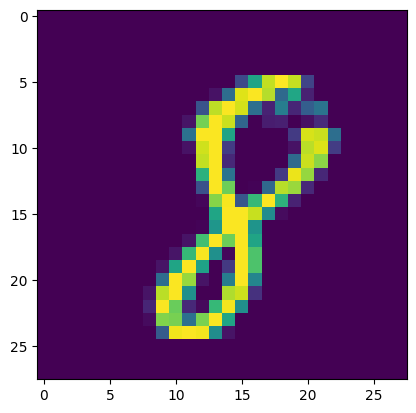

In [ ]:
i = np.random.randint(0,60000)
print(y_train[i])
plt.imshow(x_train[i])

In [11]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_train[0].min(),x_train[0].max()

(0.0, 255.0)

In [14]:
x_train = (x_train - 127.5) / 127.5

In [15]:
x_train[1].min(),x_train[1].max()

(-1.0, 1.0)

In [ ]:
buffer_size = 60000
batch_size = 256 

buffer_size / batch_size

234.375

In [17]:
type(x_train)

numpy.ndarray

In [18]:
x_train = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)

In [19]:
type(x_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [20]:
x_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [21]:
7*7*256

12544

In [43]:


def build_generator():
    inputs = tf.keras.Input(shape=(100,))
    x = layers.Dense(units=7*7*256, use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Reshape((7, 7, 256))(x)
    x = layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2DTranspose(filters=64, kernel_size=(5,5), padding='same', strides=(2,2), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    outputs = layers.Conv2DTranspose(filters=1, kernel_size=(5,5), padding='same', strides=(2,2), use_bias=True, activation='tanh')(x)
    network = tf.keras.Model(inputs, outputs)
    network.summary()
    return network

In [ ]:
"""# 100 -> 12544
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(units = 7*7*256, use_bias = False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same', use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias=True, activation='tanh'))

  network.summary()

  return network"""

In [44]:
generator  = build_generator()

Model: "functional_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_29             │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_30             │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_31             │ (None, 28, 28, 1)      │         1,601 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,945 (8.89 MB)

 Trainable params: 2,305,473 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [45]:


noise = tf.random.normal([1, 100])
output = generator(noise)
print("Output shape:", output.shape)  # (1, 28, 28, 1)

Output shape: (1, 28, 28, 1)


In [46]:

print("Generator input:", generator.input) 

Generator input: <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_524>


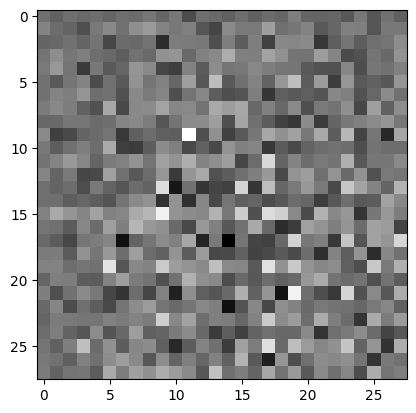

In [47]:
generated_image = generator(noise, training = False)
plt.imshow(generated_image[0, :,:,0], cmap='gray')

In [48]:
#discriminator

def build_discriminator():
    network = tf.keras.Sequential()
    network.add(layers.Conv2D(filters=64,strides=(2,2),kernel_size=(5,5),padding='same',input_shape=[28,28,1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    #7*7*128
    network.add(layers.Conv2D(filters=128,strides=(2,2),kernel_size=(5,5),padding='same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))
    
    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()
    return network

In [50]:
7*7*128

6272

In [51]:
discriminator = build_discriminator()

c:\Users\dhanu\.conda\envs\idk_gpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_discriminator():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(filters=64, strides=(2,2), kernel_size=(5,5), padding='same')(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(filters=128, strides=(2,2), kernel_size=(5,5), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1)(x)
    return tf.keras.Model(inputs, outputs)



Discriminator input: <KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_696>
Discriminator output shape: (1, 1)


In [57]:

discriminator = build_discriminator()
print("Discriminator input:", discriminator.input)

Discriminator input: <KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_705>


In [58]:
dummy_input = tf.random.normal([1, 28, 28, 1])
output = discriminator(dummy_input)
print("Discriminator output shape:", output.shape) 

Discriminator output shape: (1, 1)


In [59]:
discriminator(generated_image, training = False) # logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00048025]], dtype=float32)>

In [60]:
tf.sigmoid(-0.00081761)

<tf.Tensor: shape=(), dtype=float32, numpy=0.4997956>

In [61]:
#error calculation

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [62]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [63]:
def discriminator_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [64]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [65]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [66]:
x_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [68]:
epochs = 50
noise_dimension = 100
number_of_images = 16

In [69]:
batch_size,noise_dimension

(256, 100)

In [70]:
@tf.function

def train_step(images):
    noise = tf.random.normal([batch_size, noise_dimension])

    with tf.GradientTape() as gen_tape , tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        expected_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)    
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output, fake_output)
    
    generator_gradients = gen_tape.gradient(gen_loss,generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))
    

In [73]:
tf.config.run_functions_eagerly(True)
x_train_batch = x_train.as_numpy_iterator().next()
train_step(x_train_batch)

In [74]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [75]:
60000/256 

234.375

In [77]:
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train_step(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i + 1)
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


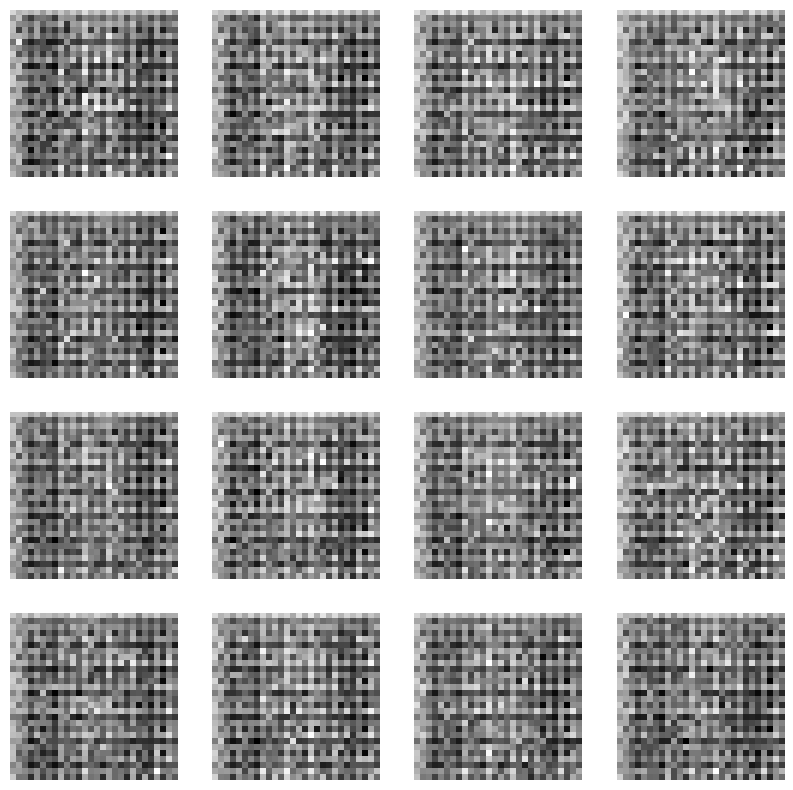

Epoch:  2


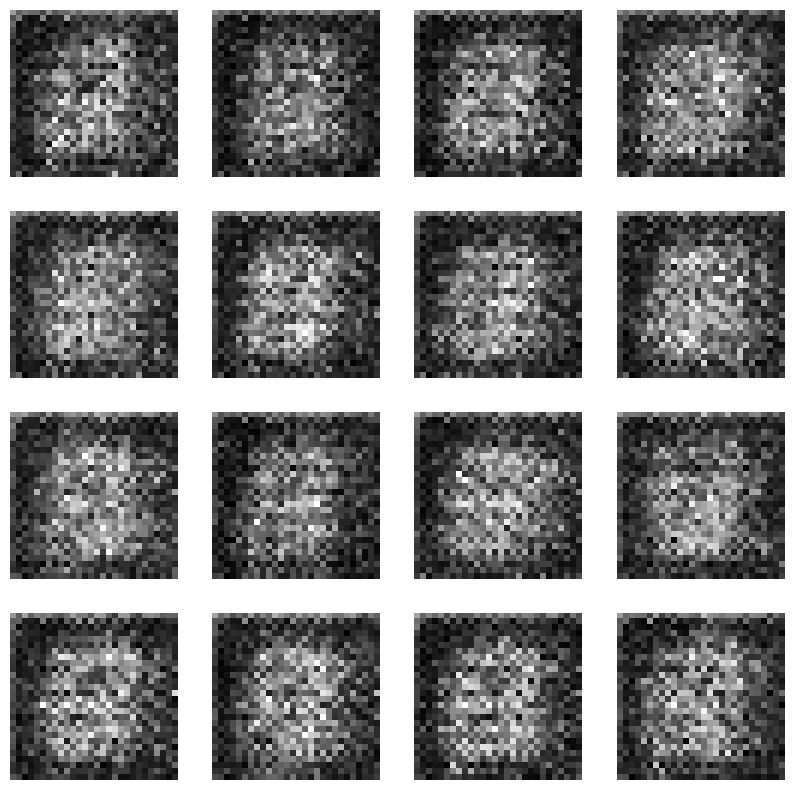

Epoch:  3


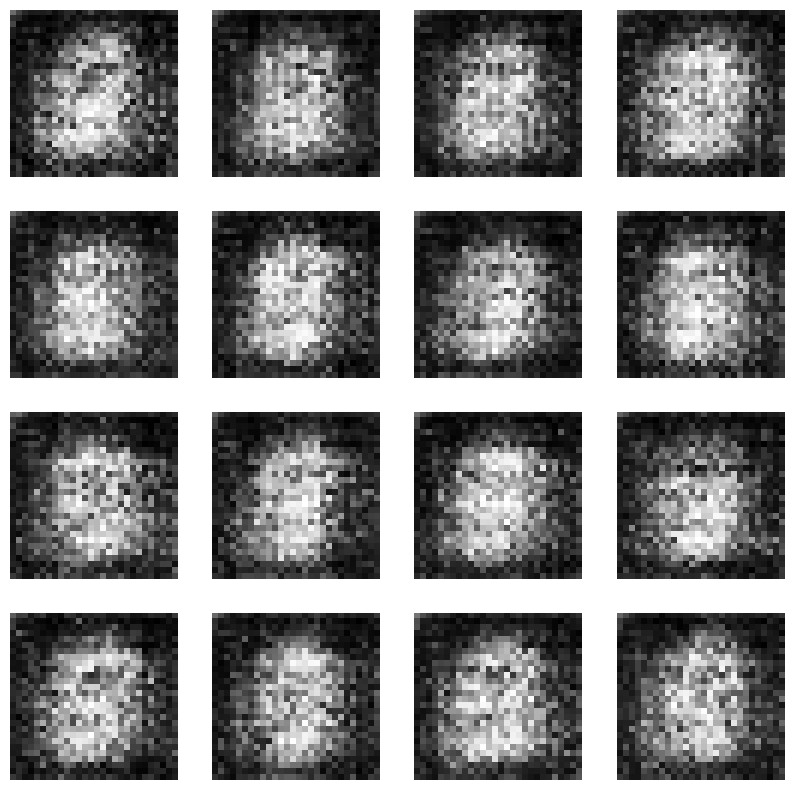

Epoch:  4


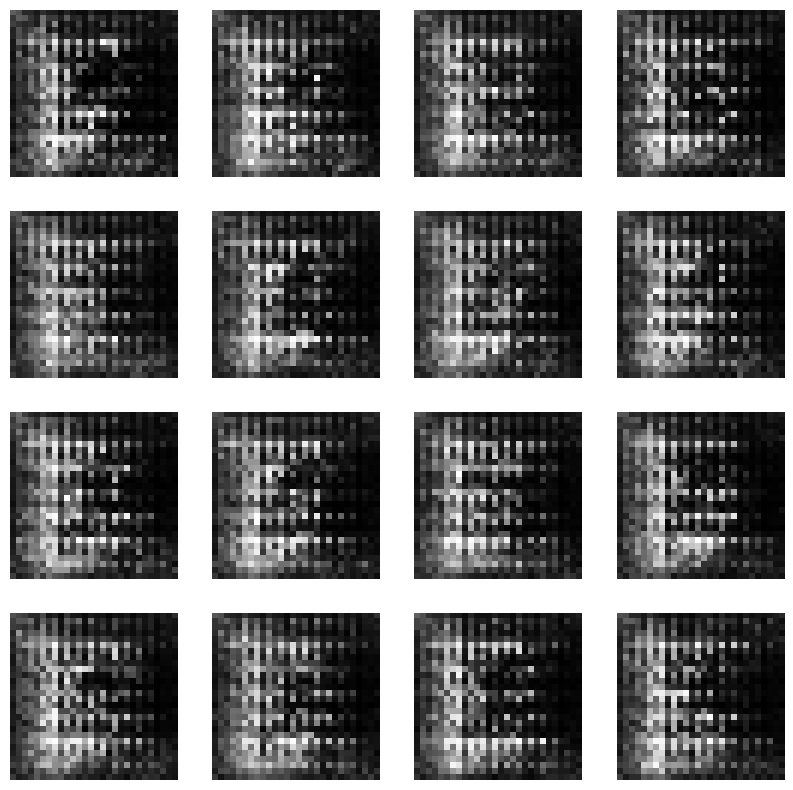

Epoch:  5


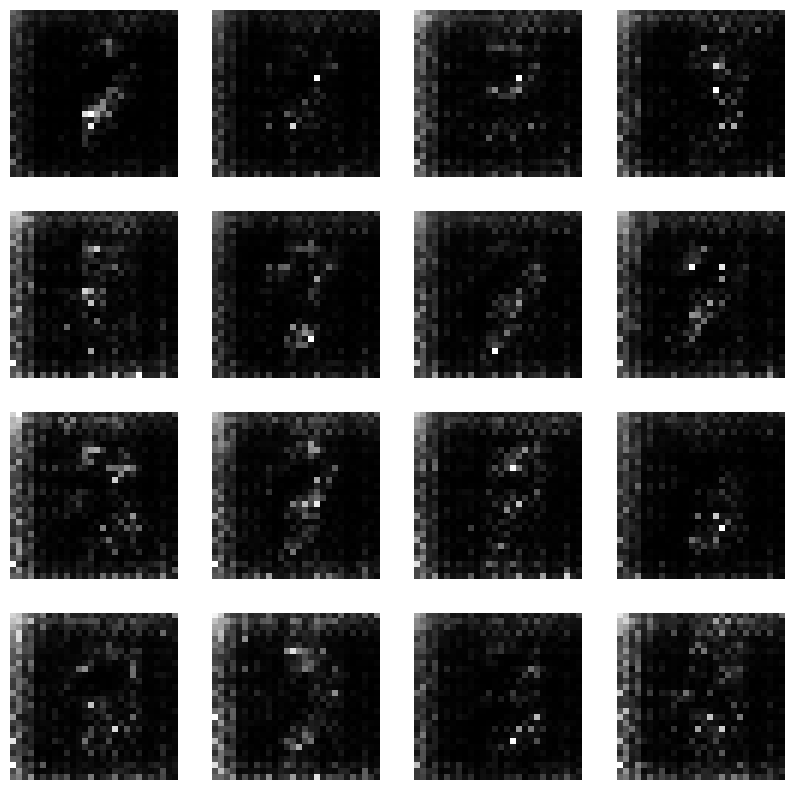

Epoch:  6


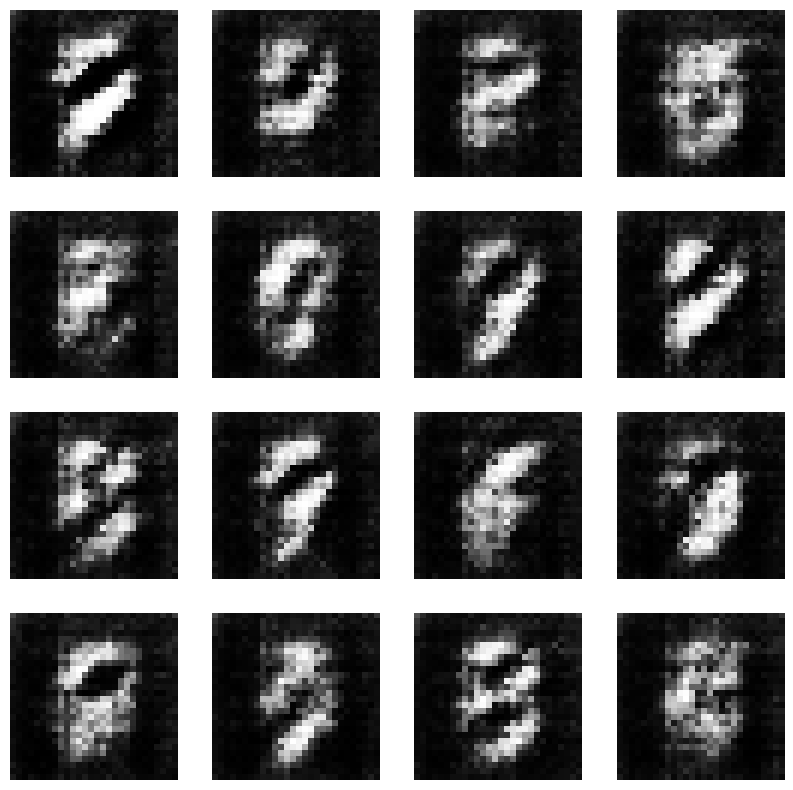

Epoch:  7


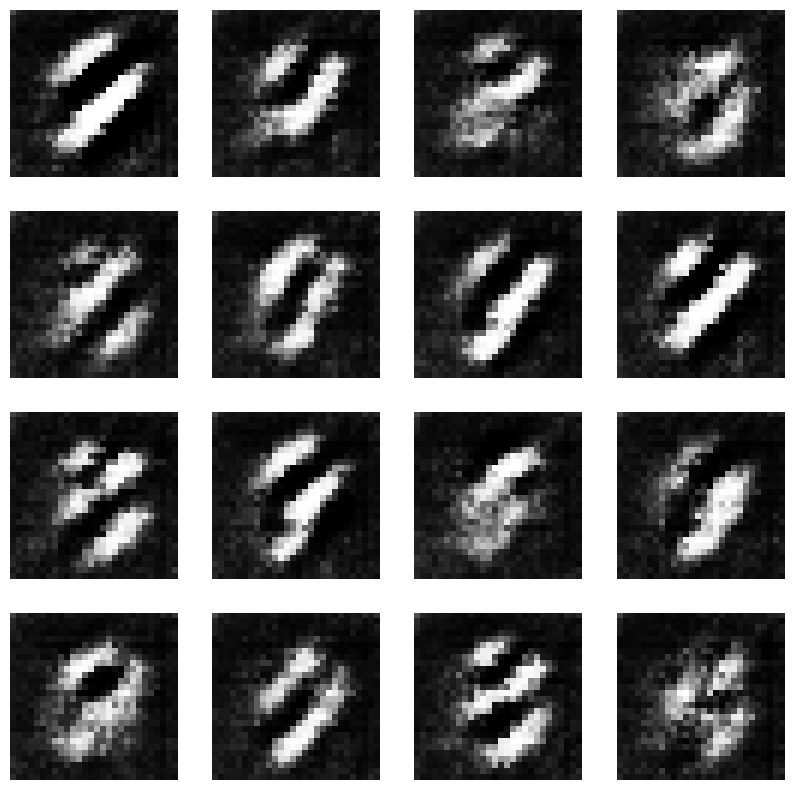

Epoch:  8


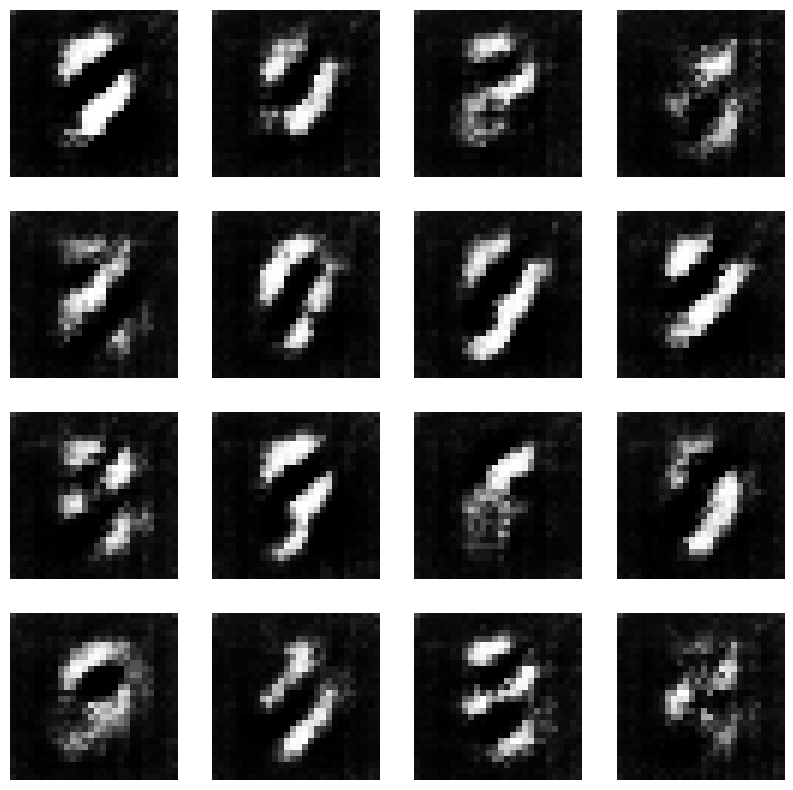

Epoch:  9


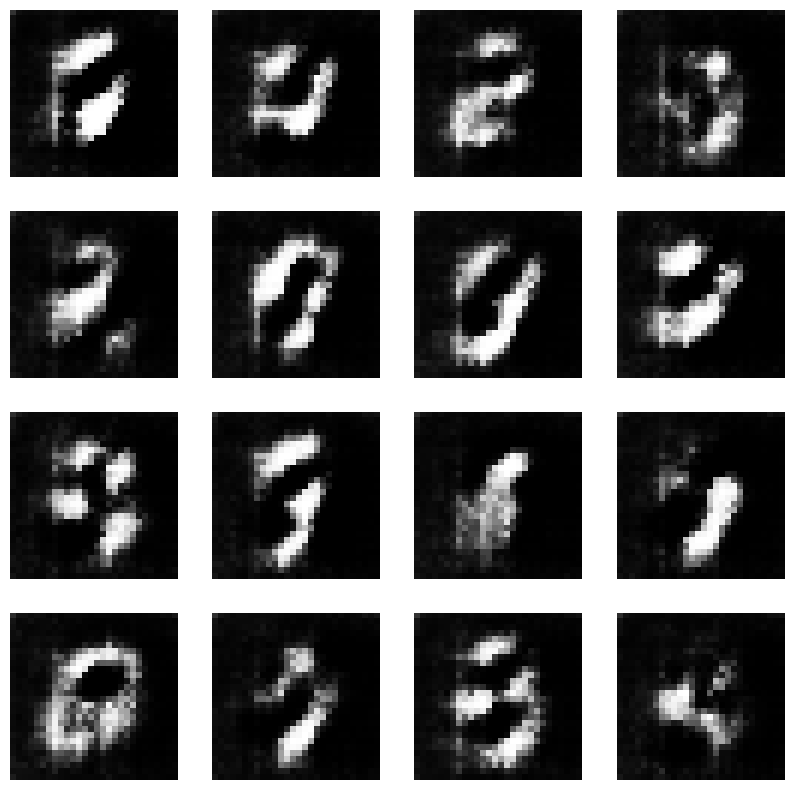

Epoch:  10


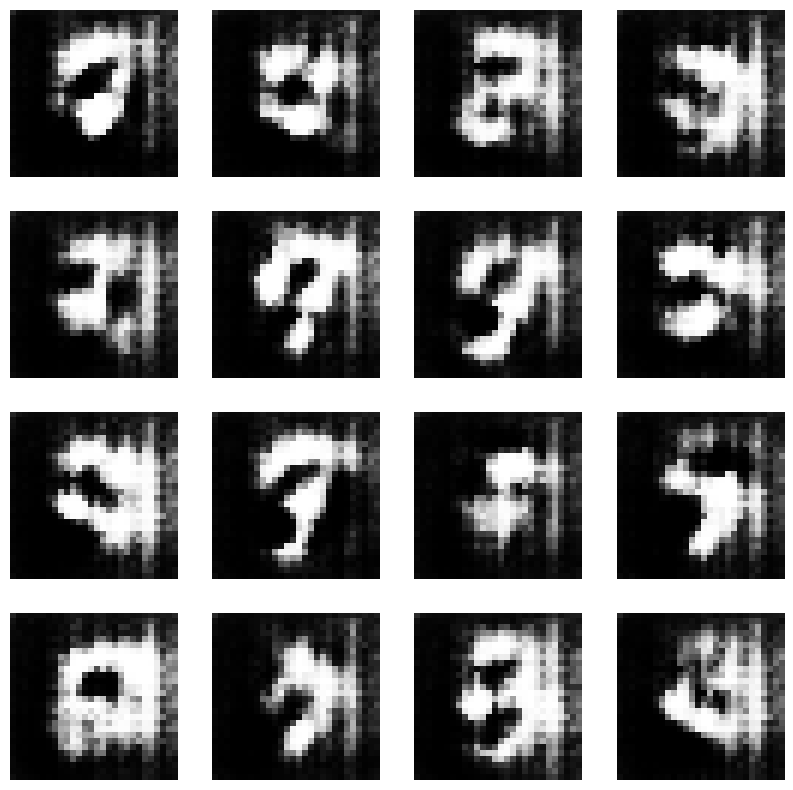

Epoch:  11


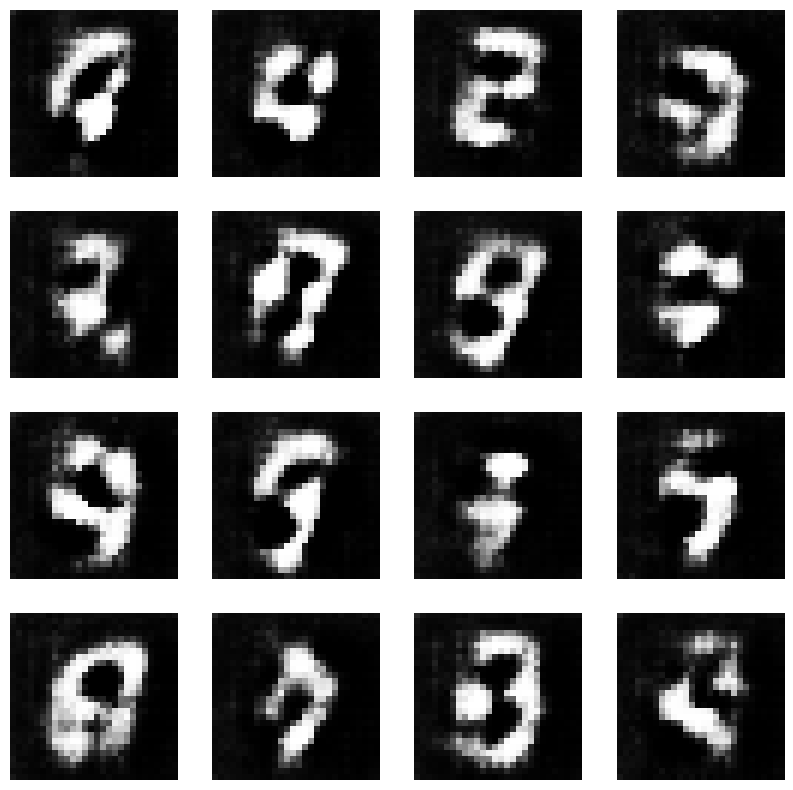

Epoch:  12


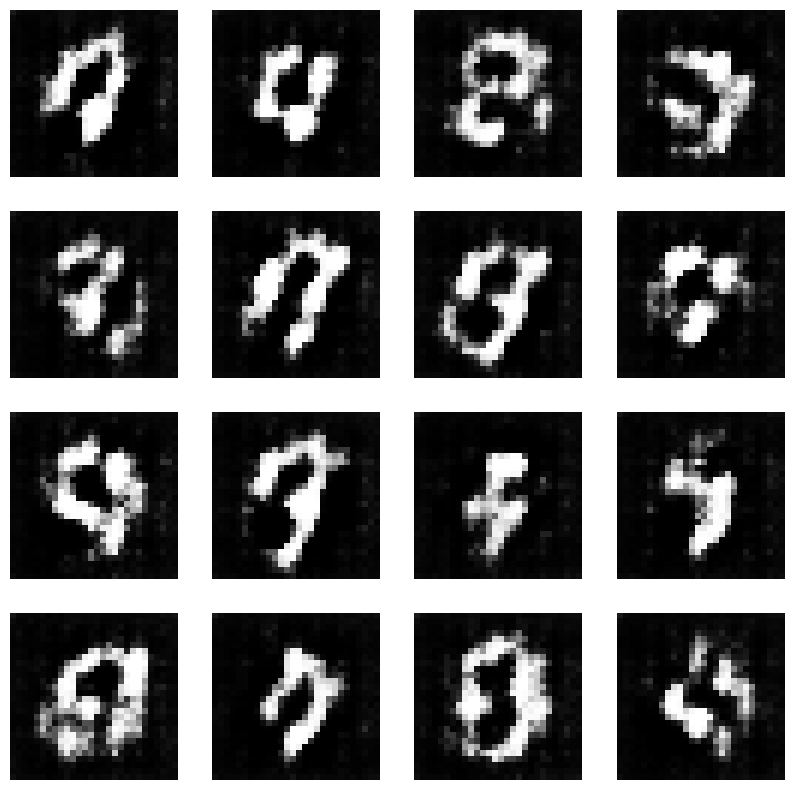

Epoch:  13


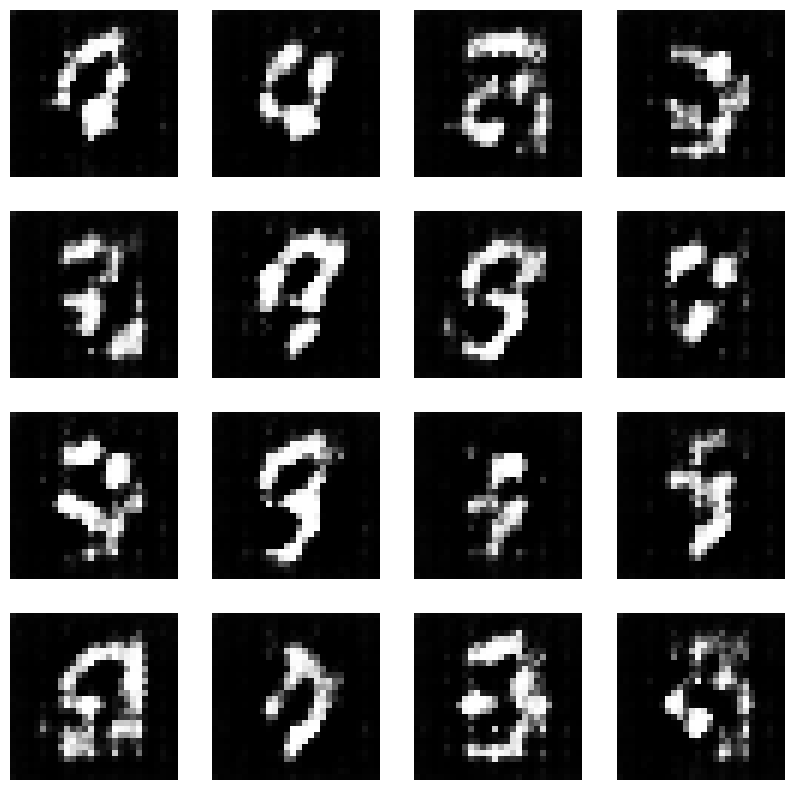

Epoch:  14


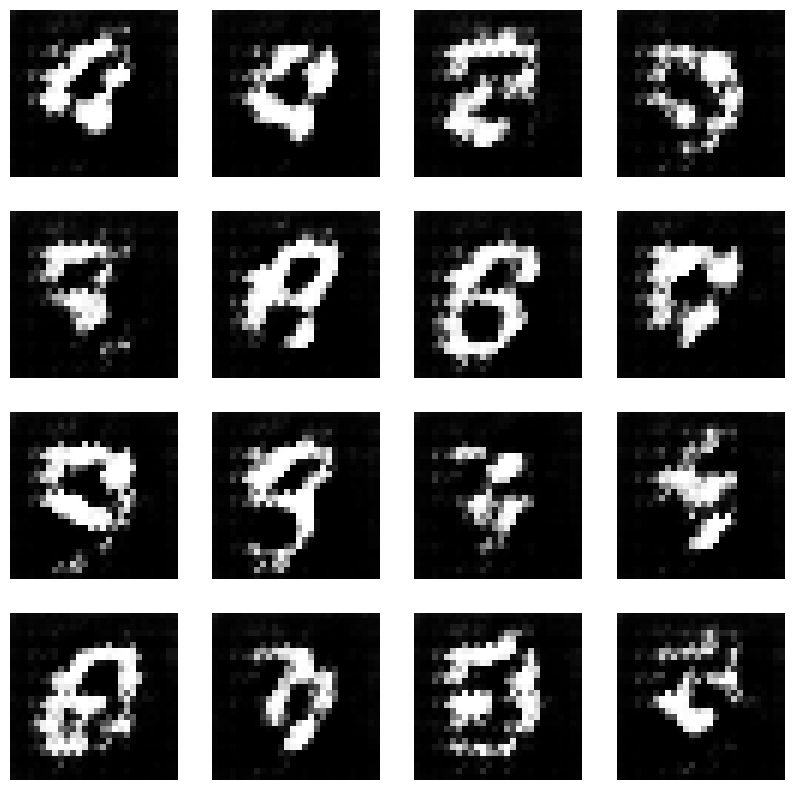

Epoch:  15


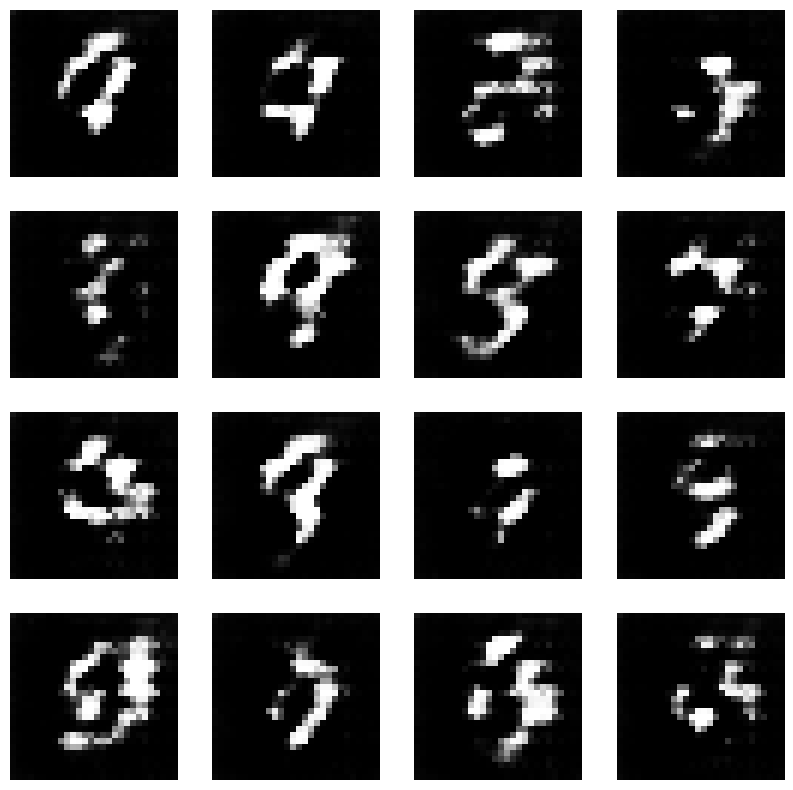

Epoch:  16


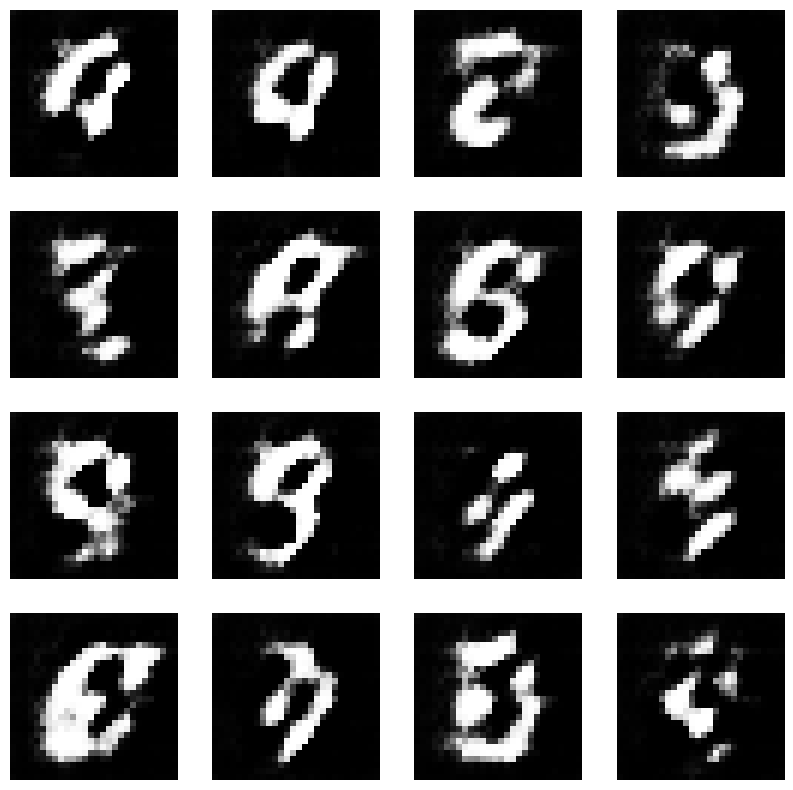

Epoch:  17


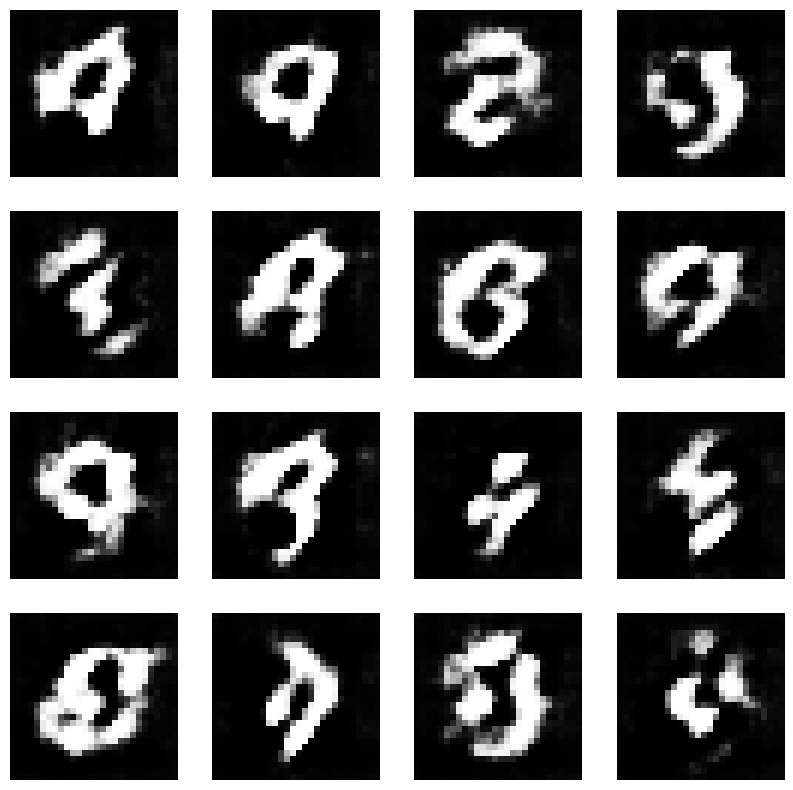

Epoch:  18


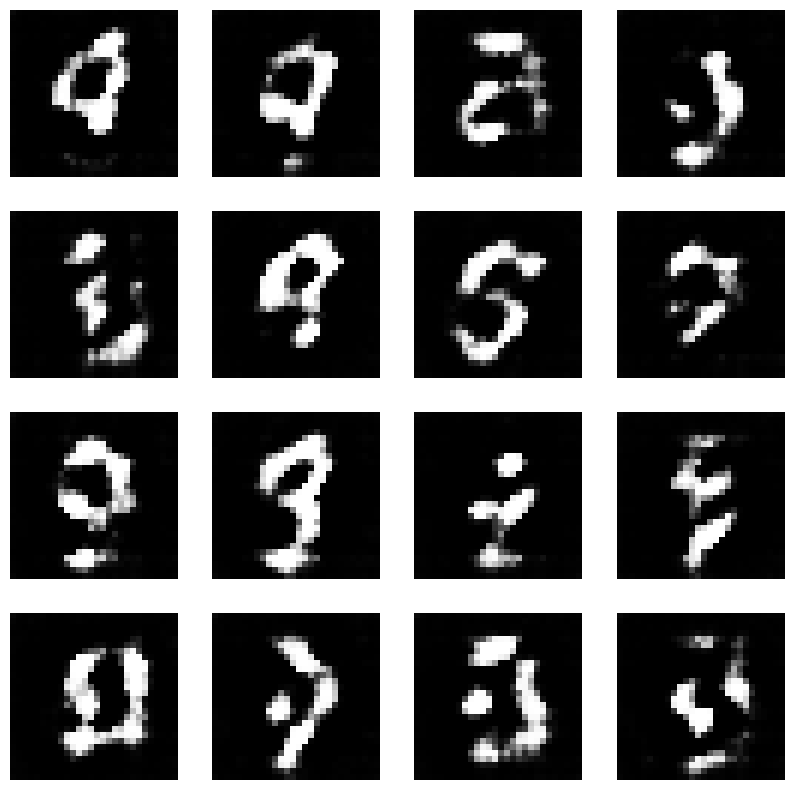

Epoch:  19


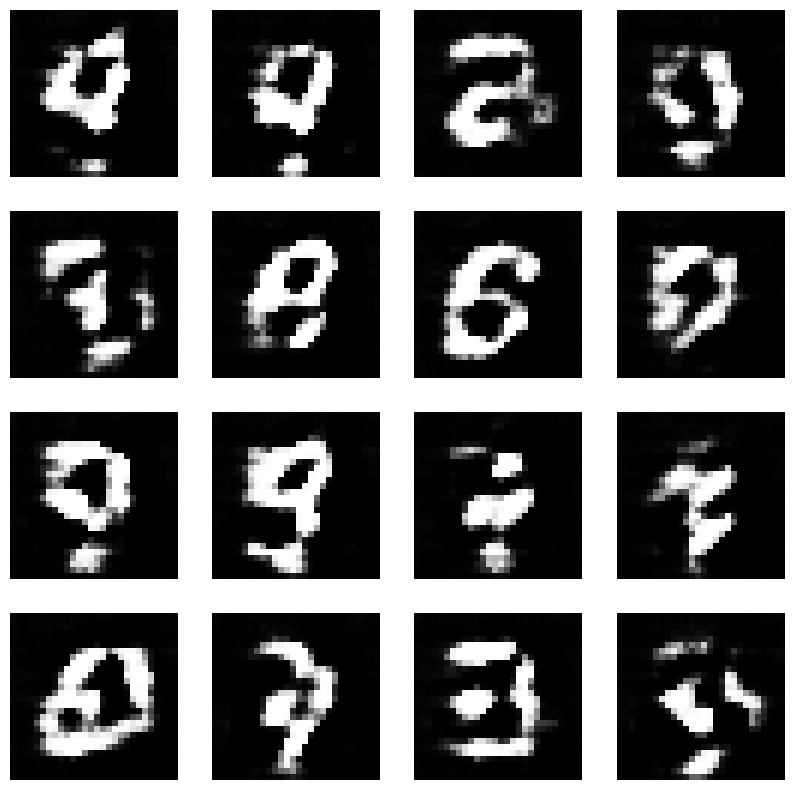

Epoch:  20


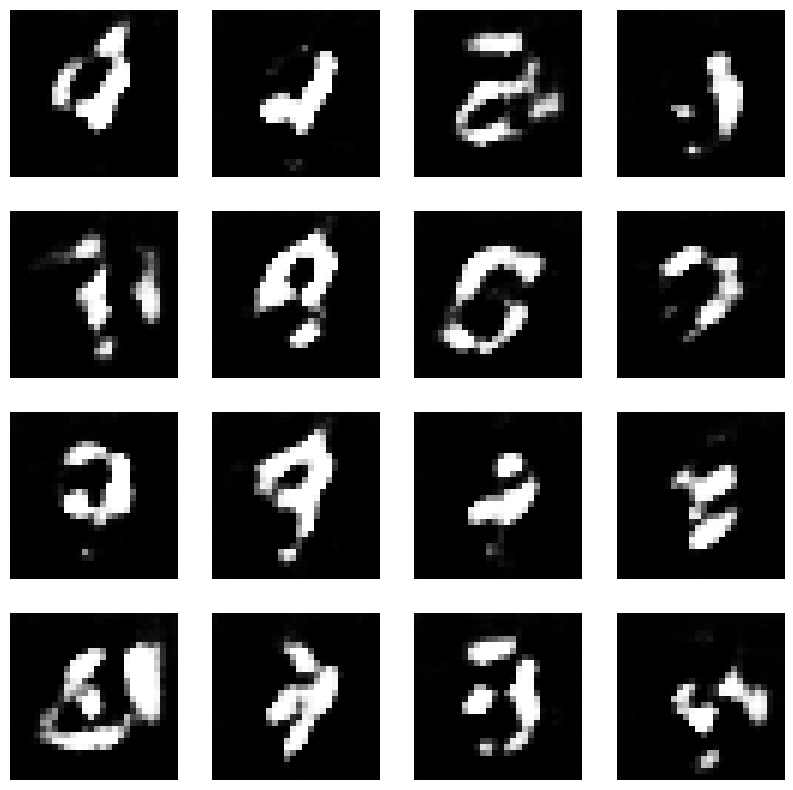

Epoch:  21


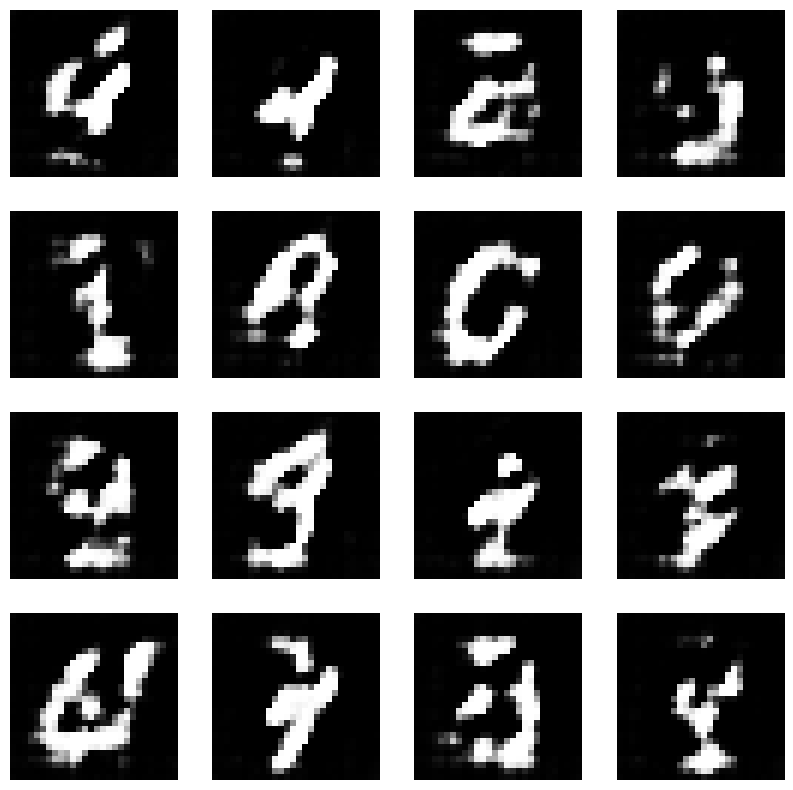

Epoch:  22


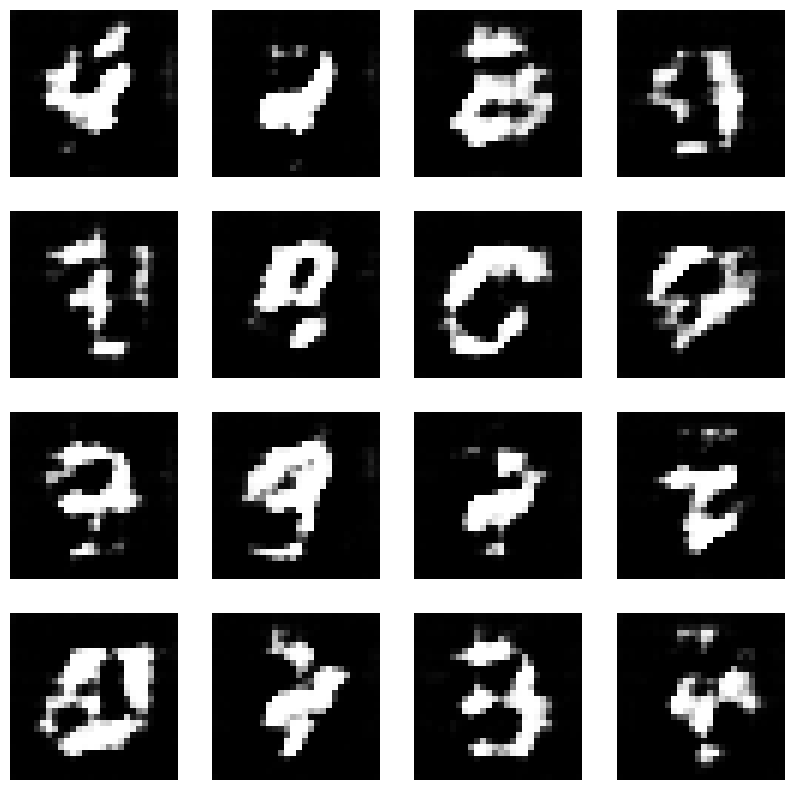

Epoch:  23


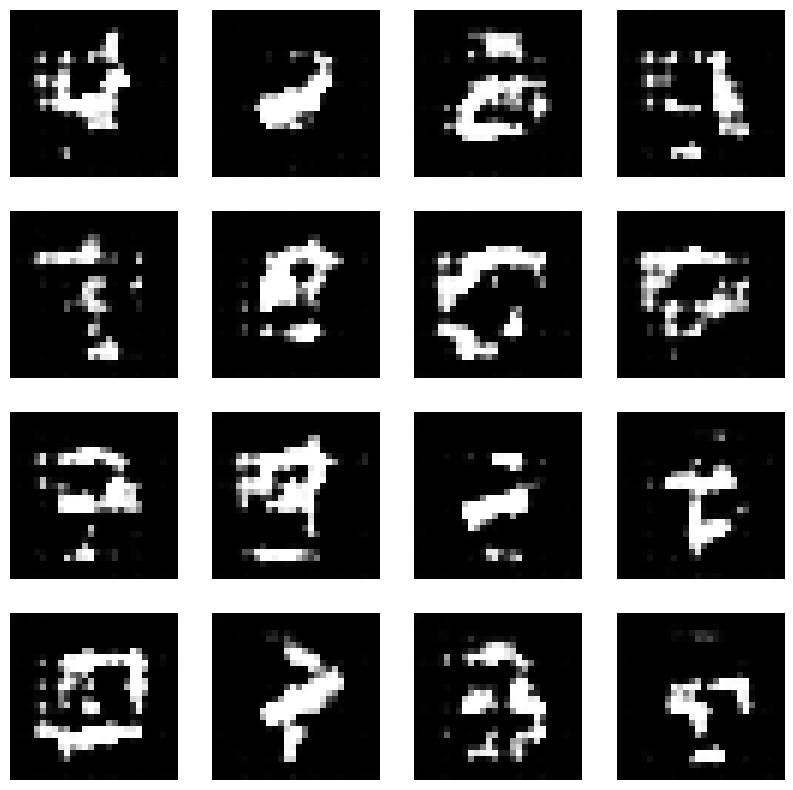

Epoch:  24


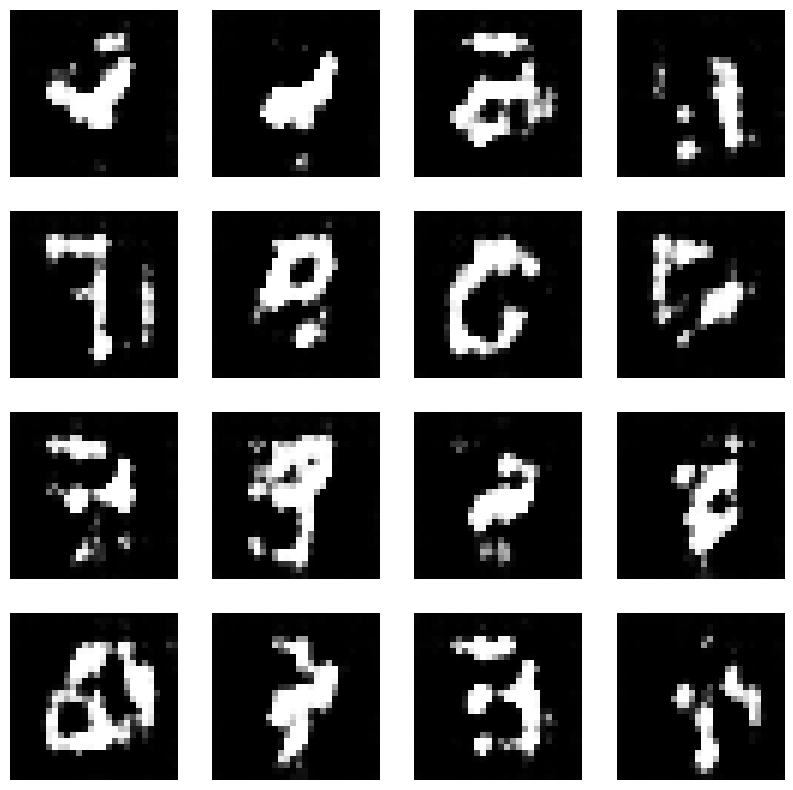

Epoch:  25


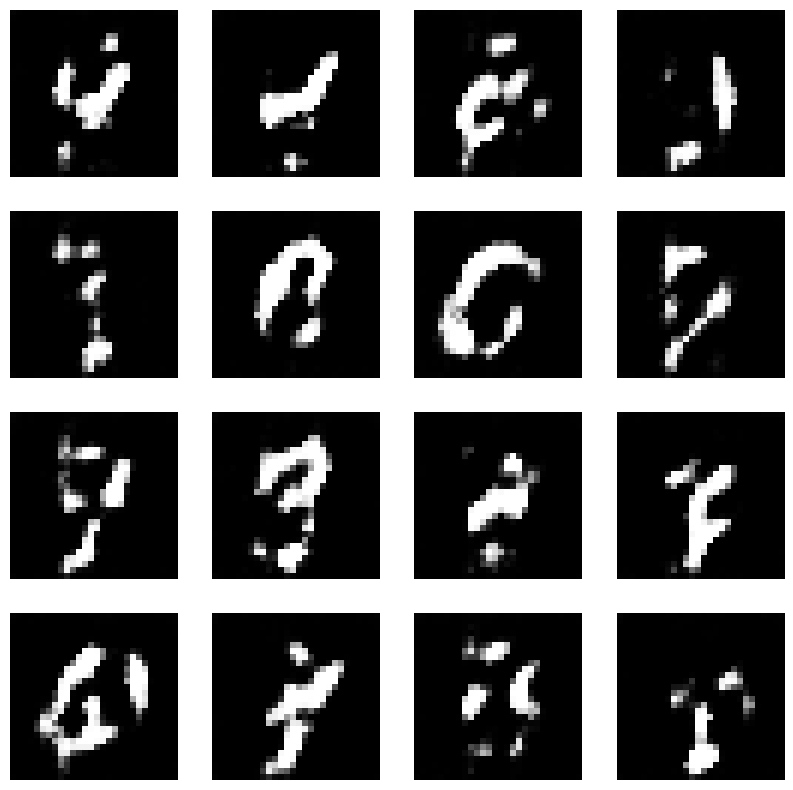

Epoch:  26


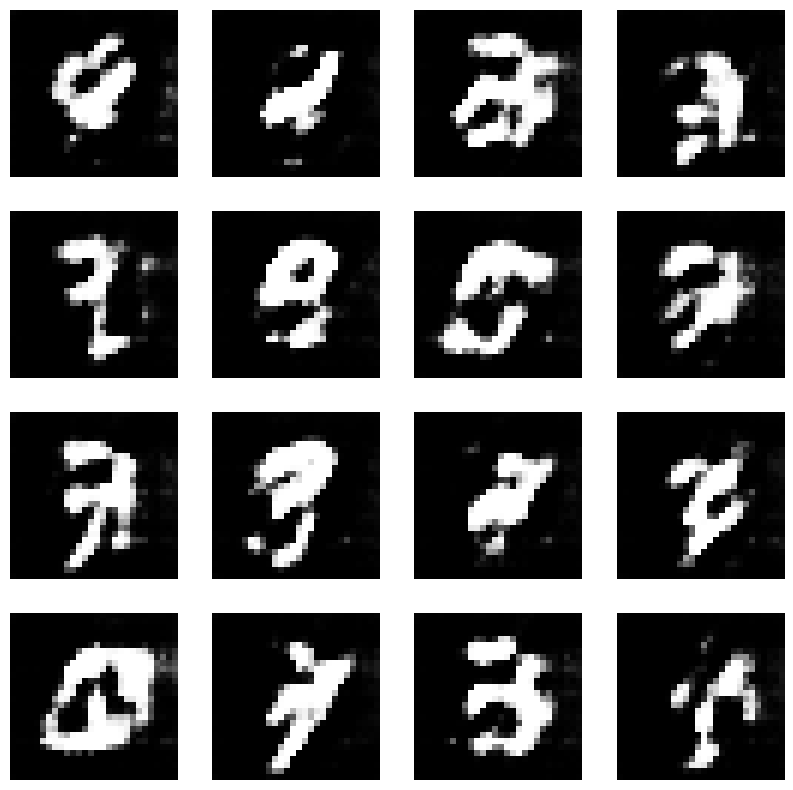

Epoch:  27


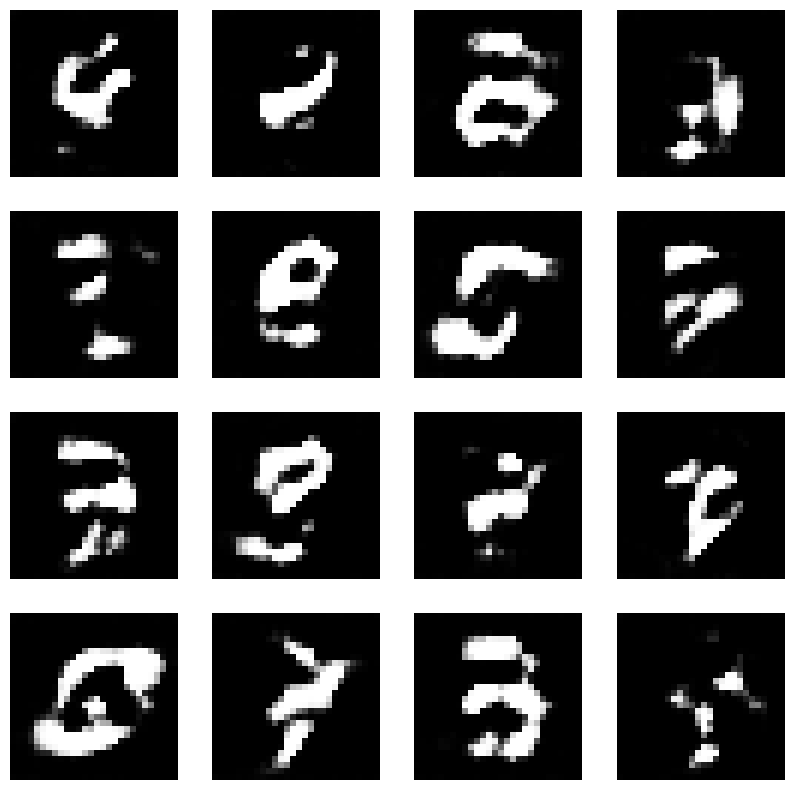

Epoch:  28


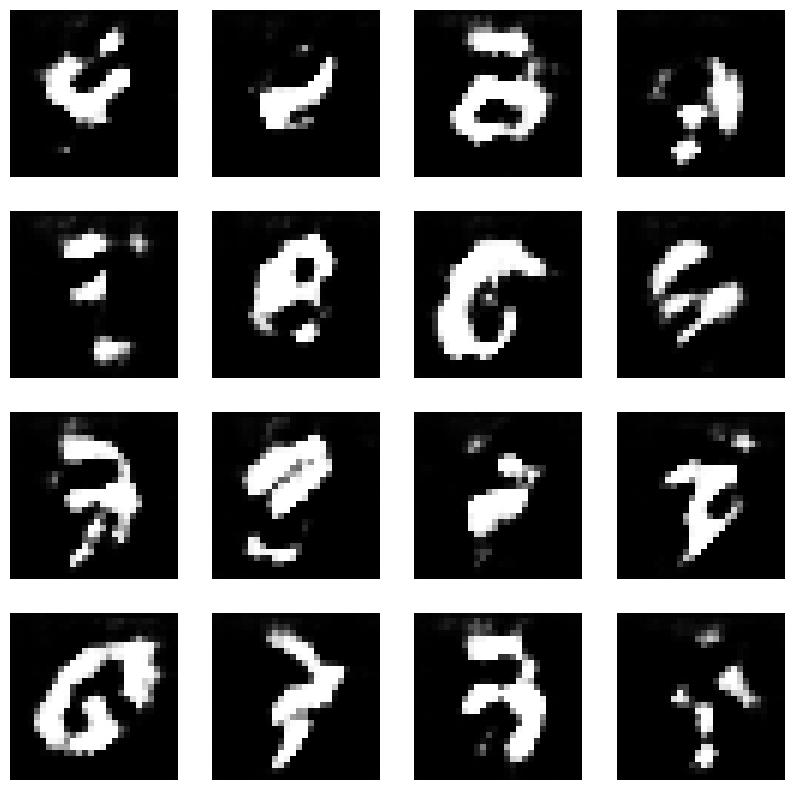

Epoch:  29


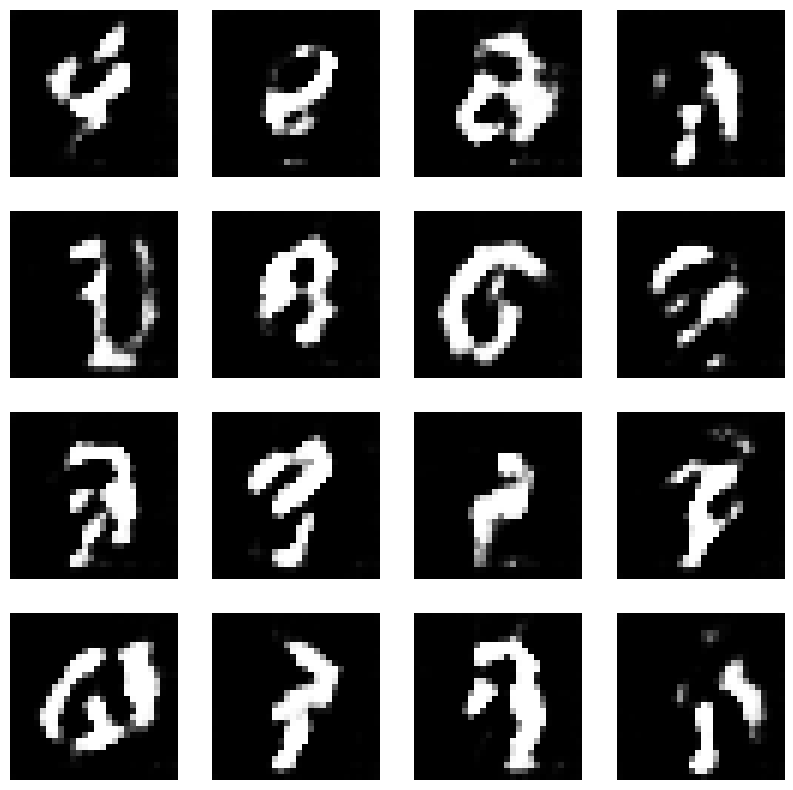

Epoch:  30


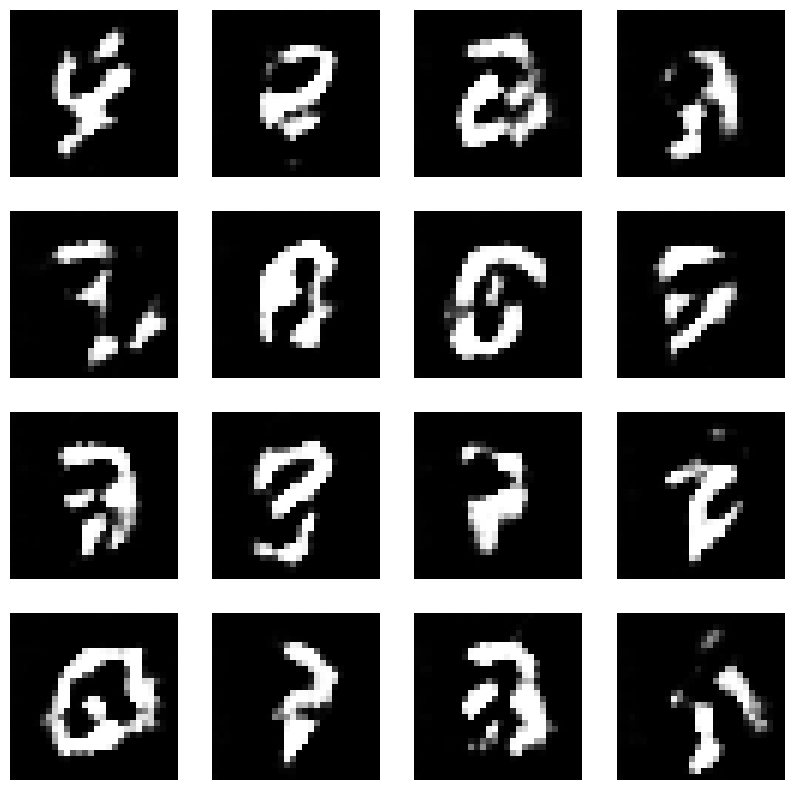

Epoch:  31


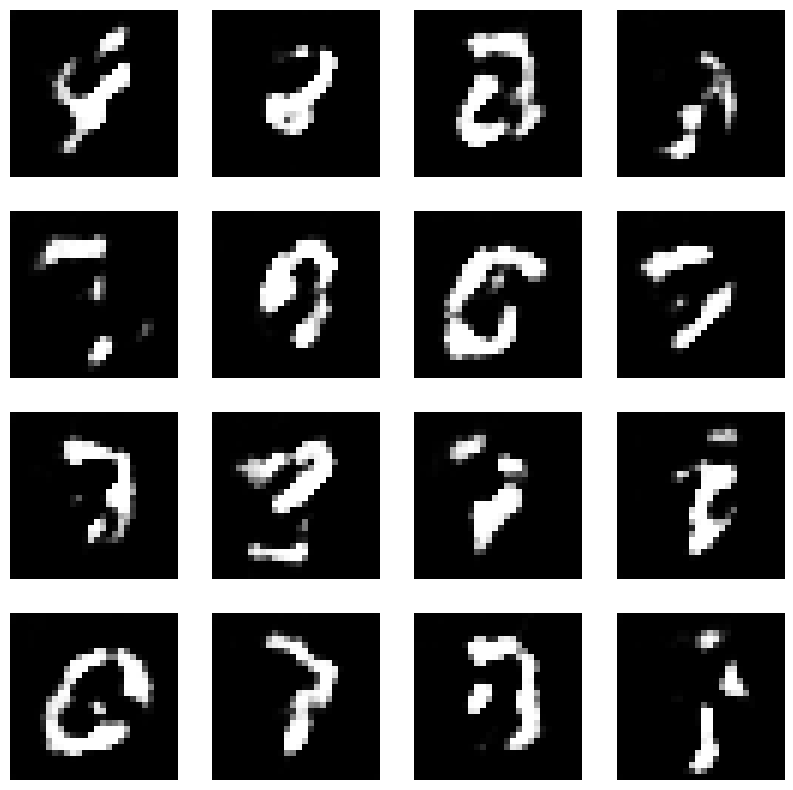

Epoch:  32


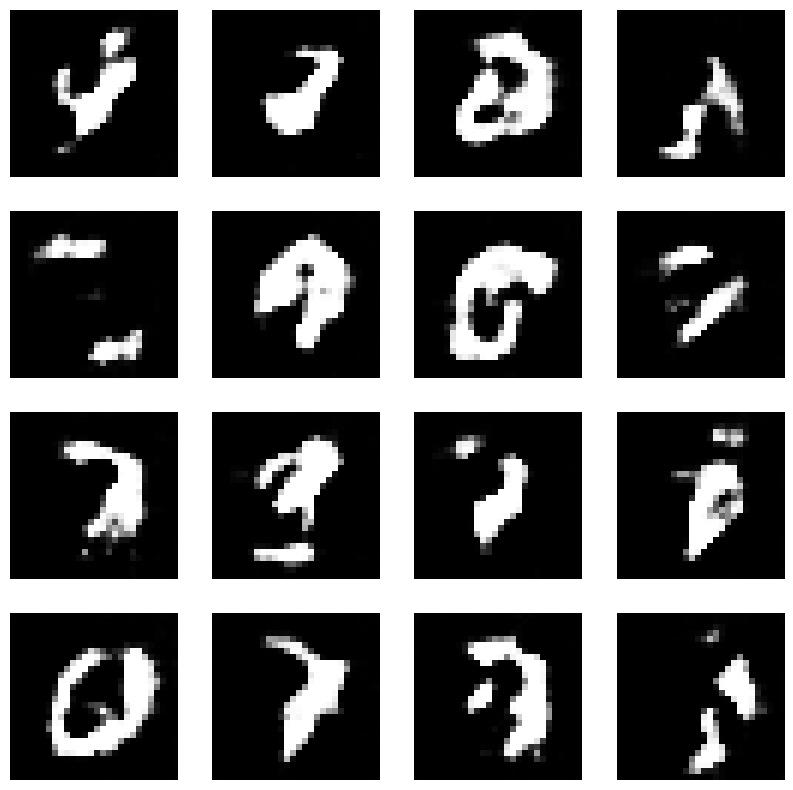

Epoch:  33


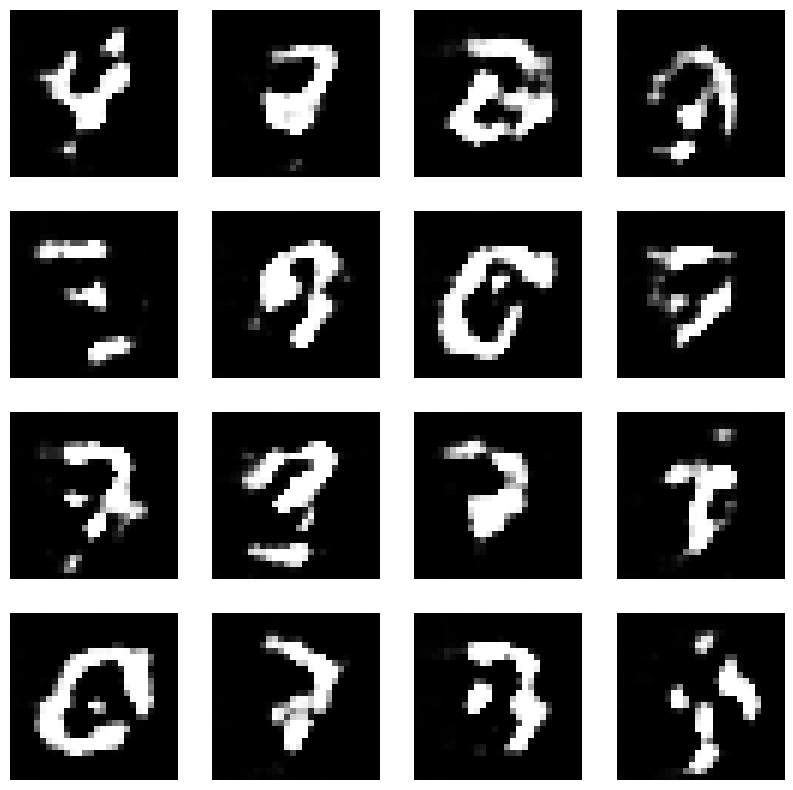

Epoch:  34


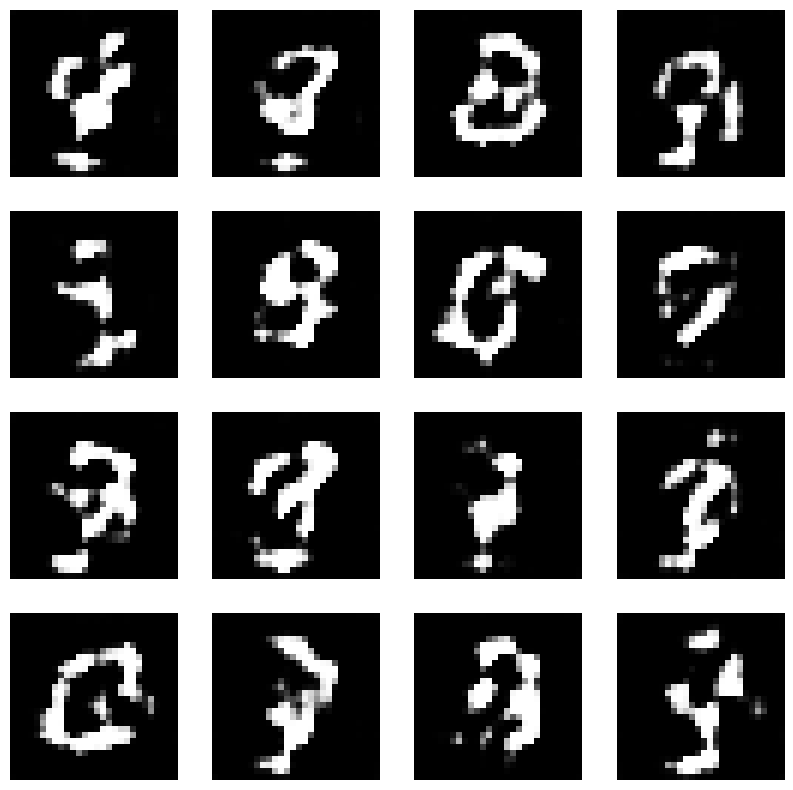

Epoch:  35


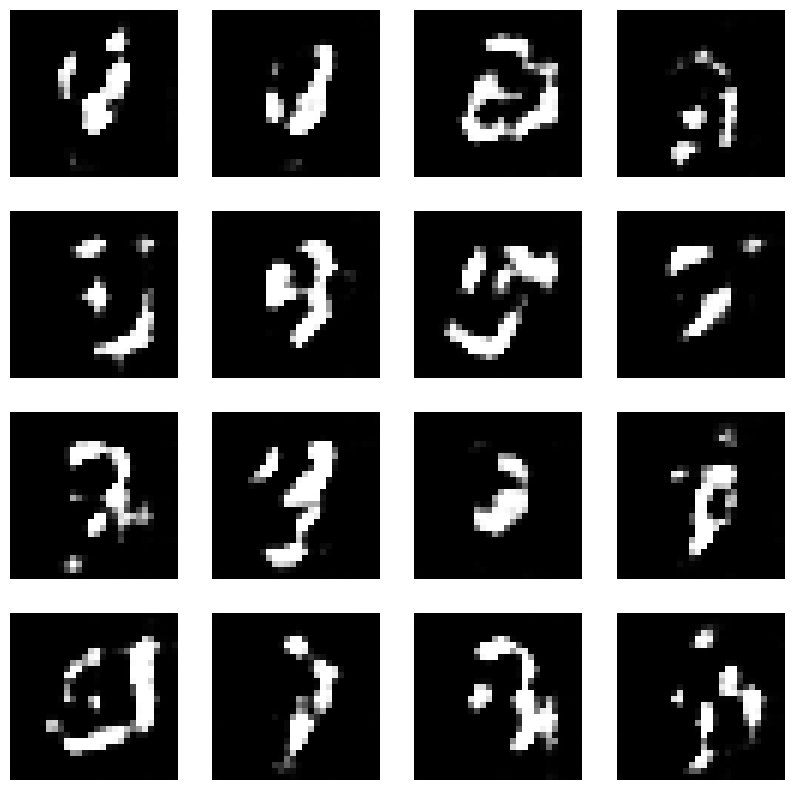

Epoch:  36


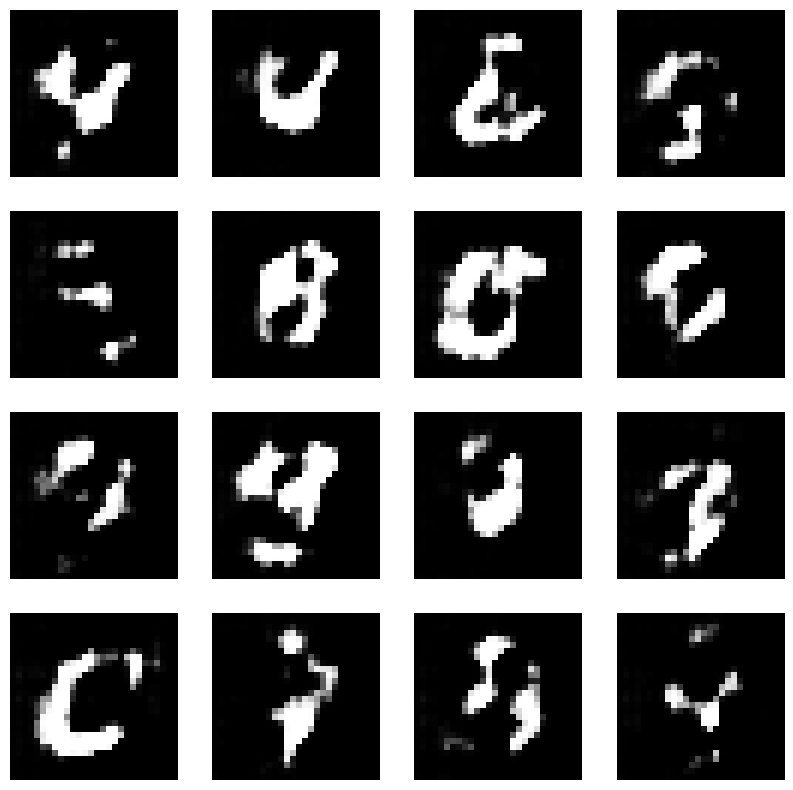

Epoch:  37


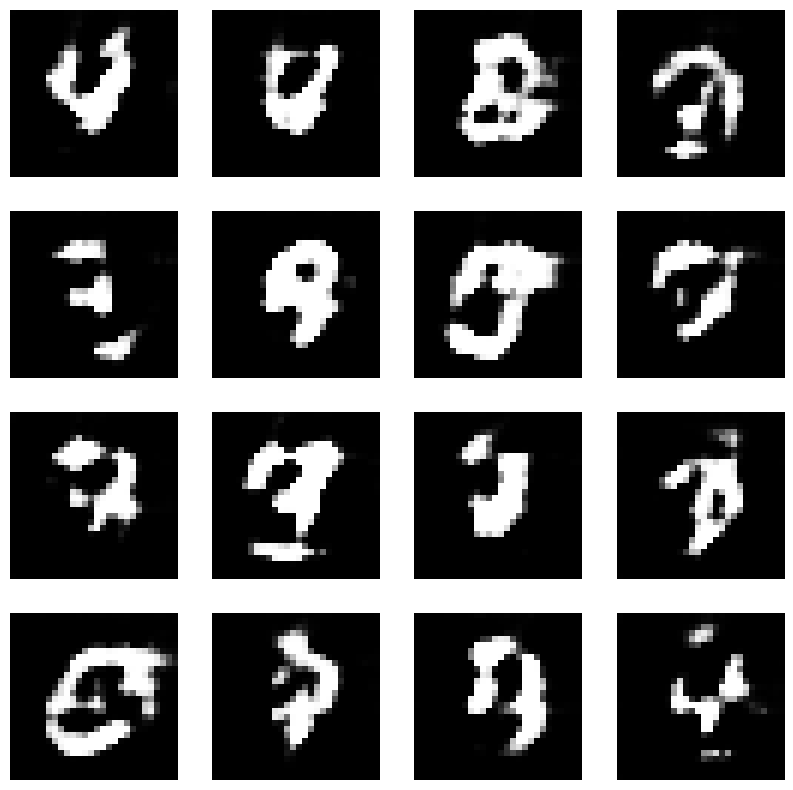

Epoch:  38


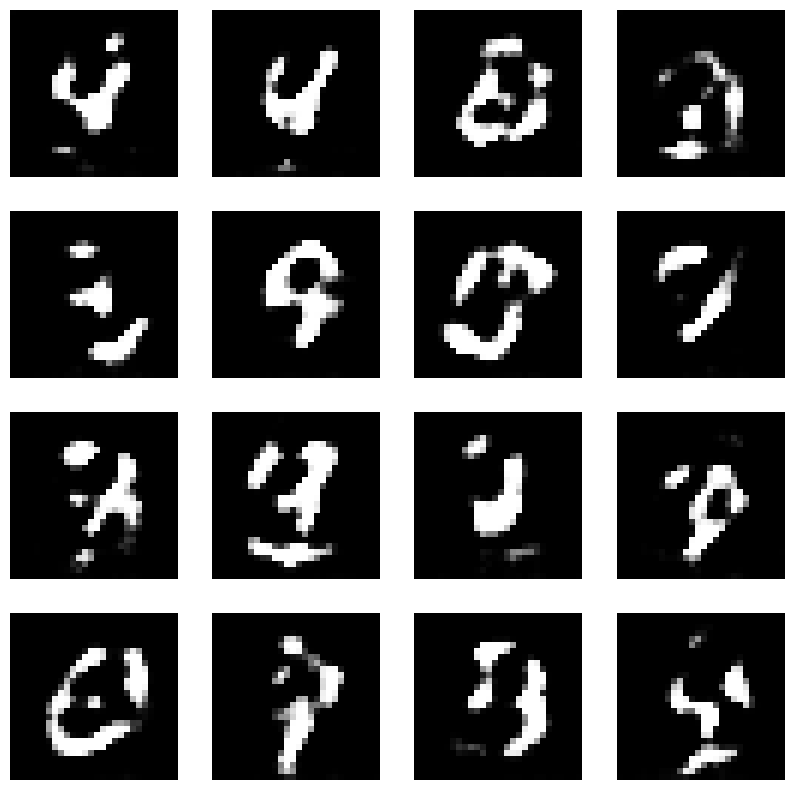

Epoch:  39


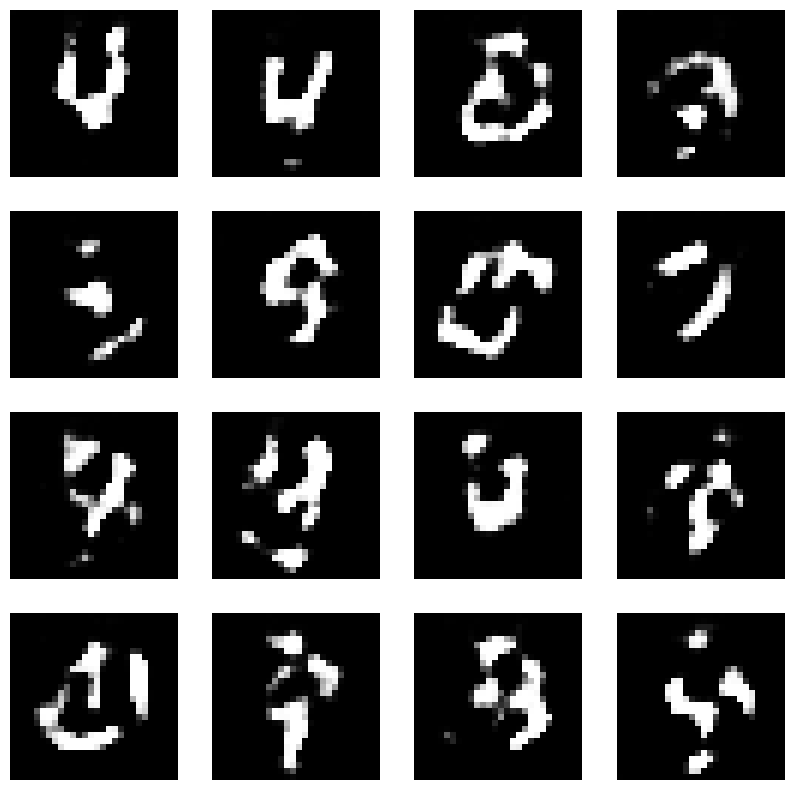

Epoch:  40


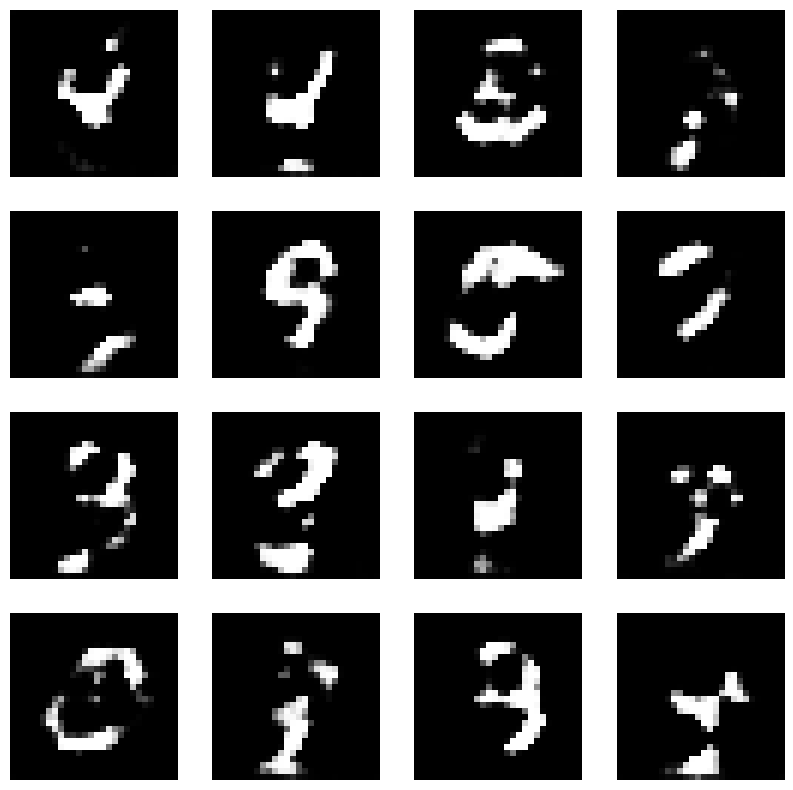

Epoch:  41


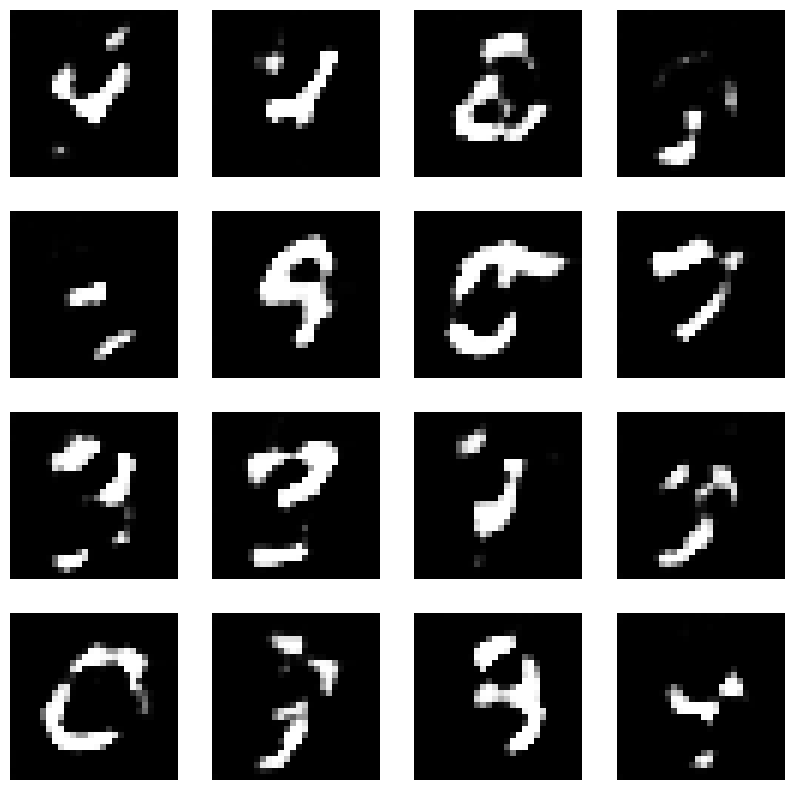

Epoch:  42


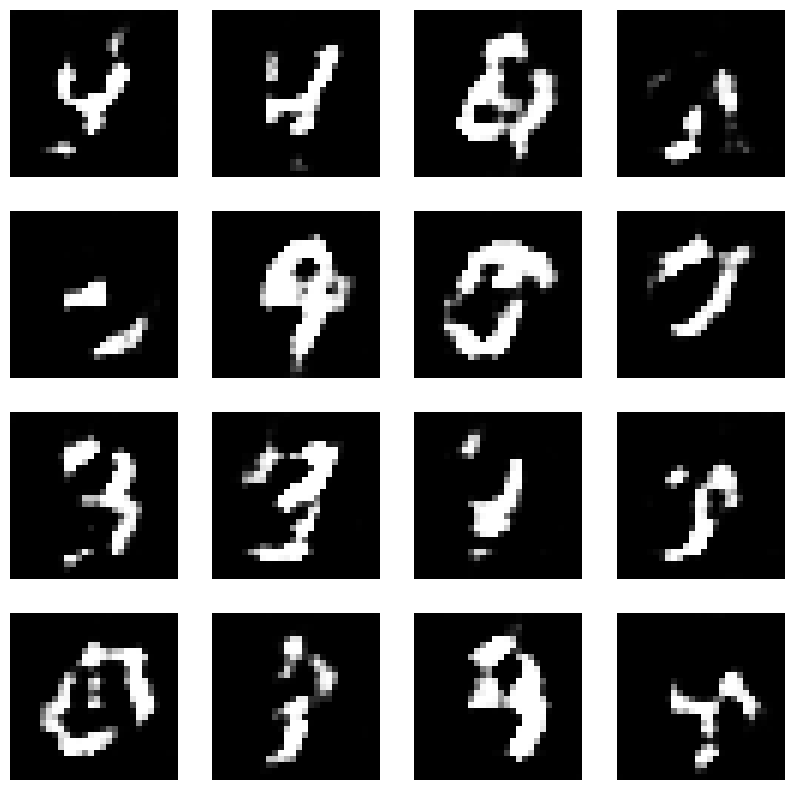

Epoch:  43


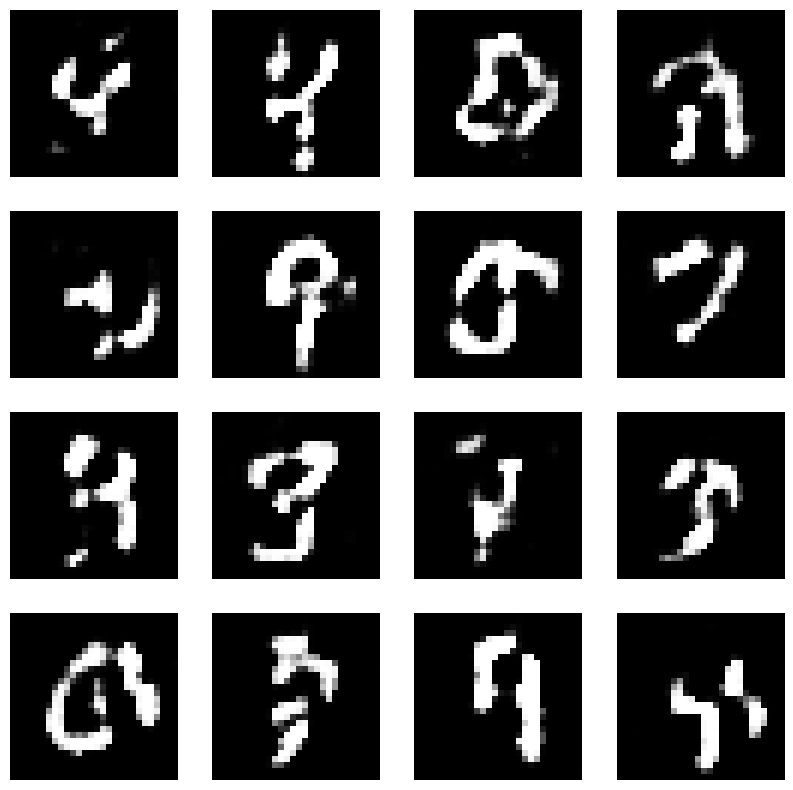

Epoch:  44


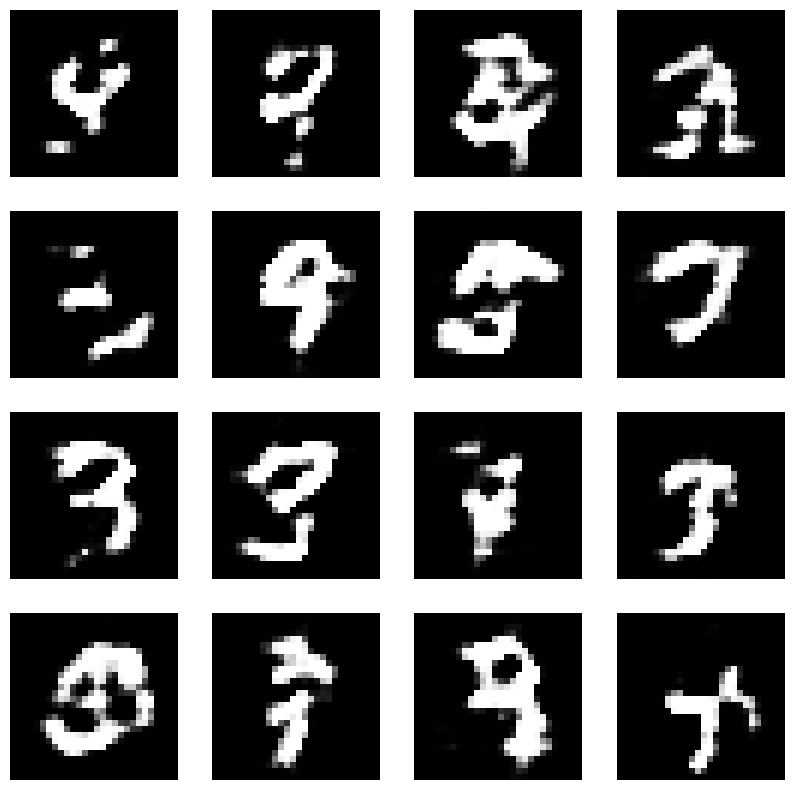

Epoch:  45


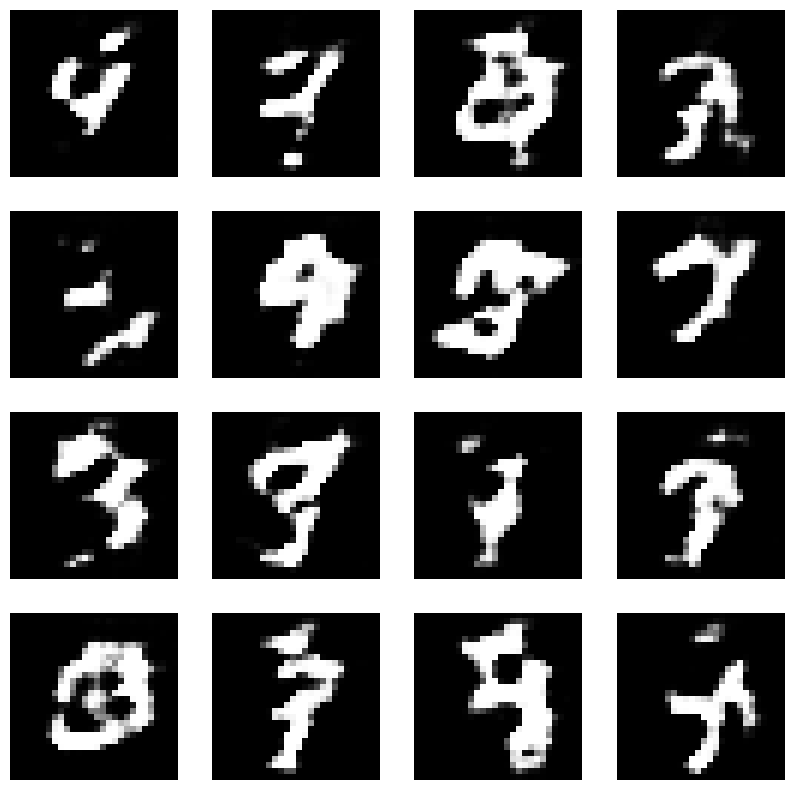

Epoch:  46


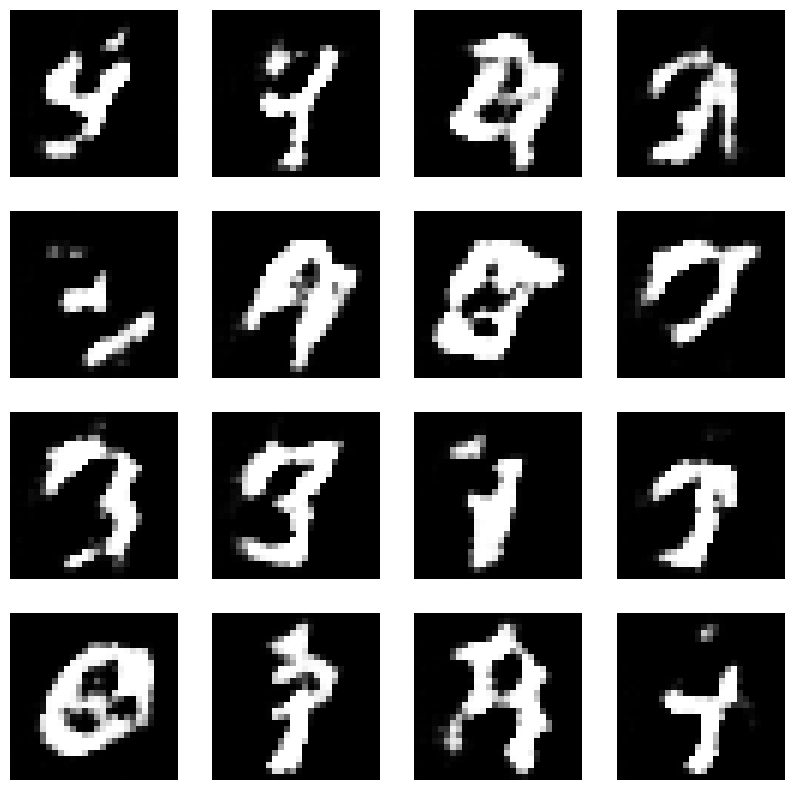

Epoch:  47


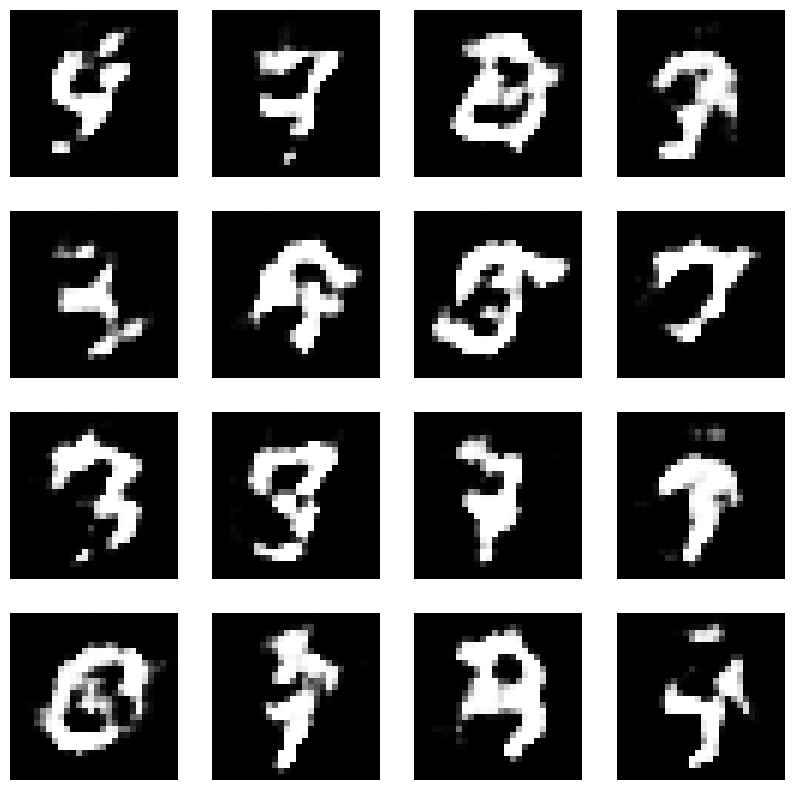

Epoch:  48


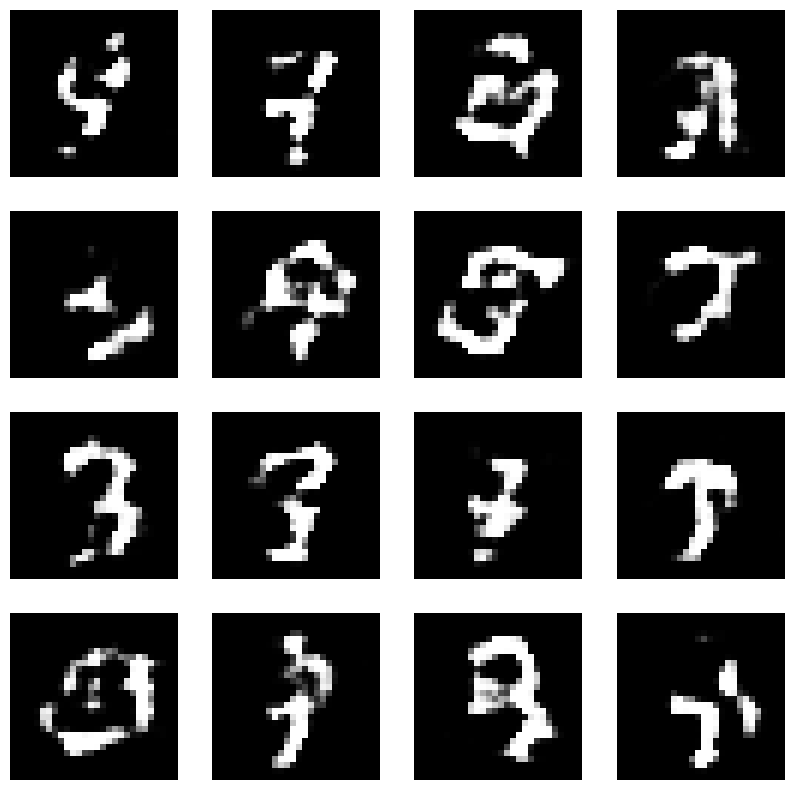

Epoch:  49


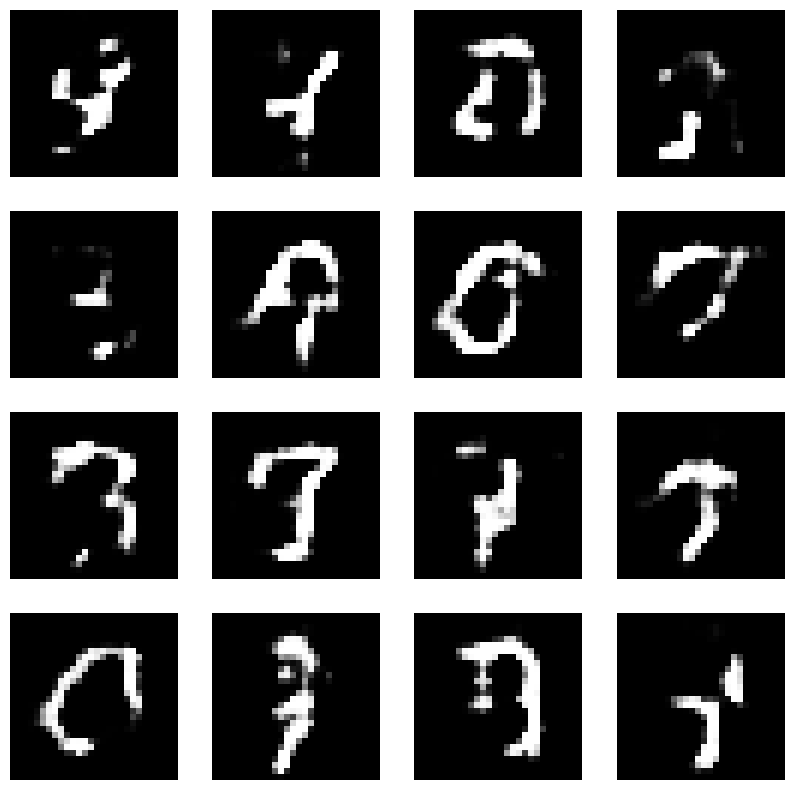

Epoch:  50


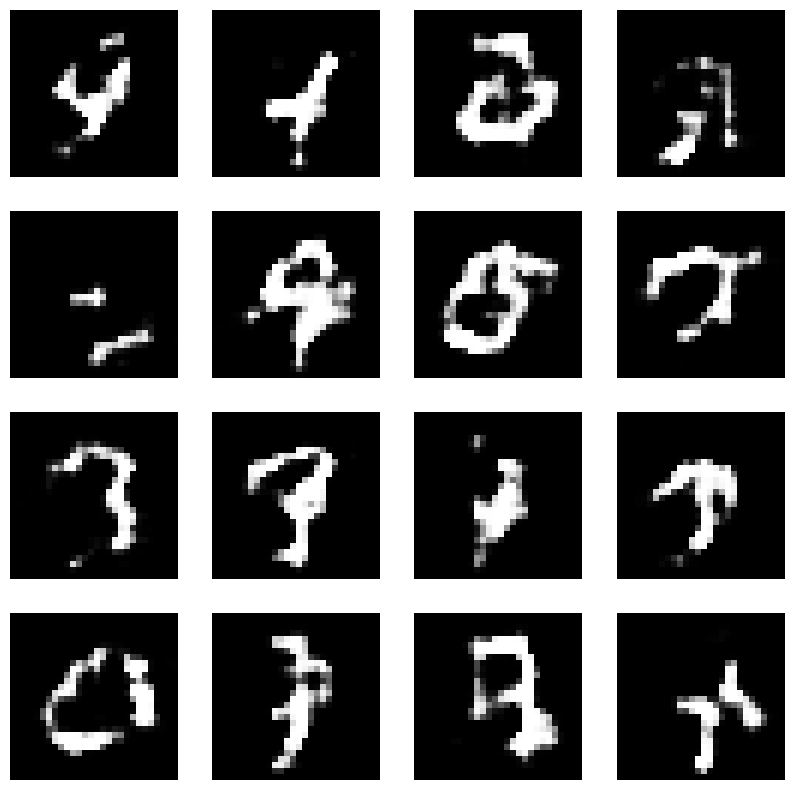

In [78]:
train_gan(x_train,epochs,test_images)